In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
%matplotlib inline

In [2]:
Q = 2.4578
Xval = np.linspace(0, Q, 100)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))

def Fermi(E,Per):
    E = E+.166*(1-Per)
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    return A
def Poss(arry):
    le = len(arry)
    New = np.array([])
    for x in range(0,le):
        a = np.random.poisson(arry[x], 1)
        New = np.append(New,a)
    return New

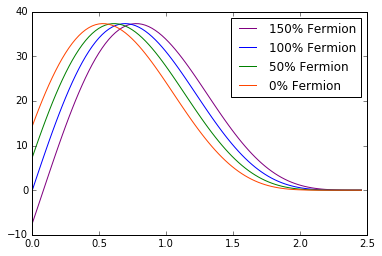

In [40]:
plt.plot(Xval,Fermi(Xval,1.5) ,label="150% Fermion",color='purple')
plt.plot(Xval,Fermi(Xval,1) ,label="100% Fermion",color='Blue')
plt.plot(Xval,Fermi(Xval,.5),label="50% Fermion",color='Green')
plt.plot(Xval,Fermi(Xval,0) ,label="0% Fermion",color='orangered')
plt.legend()
plt.show()

In [3]:
np.random.poisson(.2, 1)

array([0])

In [4]:

testBin = np.linspace(0, 2.3,endpoint=True, num=30)
testBin[2] - testBin[1]

0.079310344827586199

In [5]:
FF = Fermi(testBin,1)
dx = testBin[2]-testBin[1]
A = sum(FF)*dx
COR = 200e3/A
COR

5034.1294096595948

In [6]:
sum(FF*COR*dx)

199999.99999999997

In [7]:
Truth = FF*COR

In [8]:
np.random.poisson(1.91374655e+02, 1)

array([181])

In [10]:
Poss(Truth)*dx

array([  0.00000000e+00,   2.84057931e+03,   5.50826207e+03,
         7.92580000e+03,   1.00855793e+04,   1.18892552e+04,
         1.33433310e+04,   1.42959276e+04,   1.47673483e+04,
         1.48852828e+04,   1.46443379e+04,   1.40009724e+04,
         1.30383828e+04,   1.19074966e+04,   1.05280517e+04,
         9.16137586e+03,   7.80738966e+03,   6.40787931e+03,
         5.06816897e+03,   3.90896897e+03,   2.89355862e+03,
         2.04874483e+03,   1.38602759e+03,   8.51475862e+02,
         4.96800000e+02,   2.52286207e+02,   1.12065517e+02,
         4.02103448e+01,   1.05482759e+01,   2.22068966e+00])

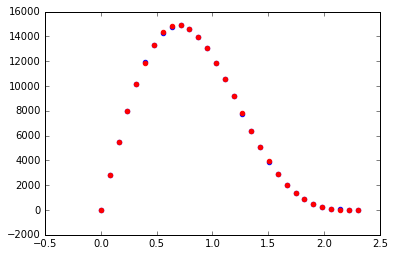

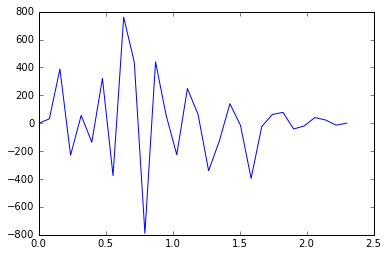

In [11]:

plt.scatter(testBin,Truth*dx ,label="100% Fermion",color='Blue')
plt.scatter(testBin,Poss(Truth)*dx ,label="100% Fermion",color='red')

plt.show()
plt.plot(testBin,Poss(Truth)-Truth)
plt.show()

In [12]:
cd /Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH-v2/

/Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH-v2


In [13]:
def write_File(Data,name):
    Name = "{0:.4f}".format(name)
    path = "/Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH-v2/Truth-V2-"+Name+".txt"
    np.savetxt(path,Data)

In [66]:
Pferm = np.linspace(0.0,1.5,1501)
Pferm

array([  0.00000000e+00,   1.00000000e-03,   2.00000000e-03, ...,
         1.49800000e+00,   1.49900000e+00,   1.50000000e+00])

In [67]:
len(Pferm)

1501

In [80]:
for x in range(0,len(Pferm)):
    FF = Fermi(testBin,Pferm[x])
    dx = testBin[2]-testBin[1]
    A = sum(FF)*dx
    COR = 50e3/A
    dat =abs( FF*COR)*dx
    write_File(dat,Pferm[x])

In [81]:
files = glob.glob('*.txt')
LL = len(files)
Expected = dict()
for q in range(0,LL):
    Expected[q] = np.genfromtxt(files[q],delimiter=',')
PFermion = np.linspace(0.0,1.5,LL)

In [82]:
LL

1501

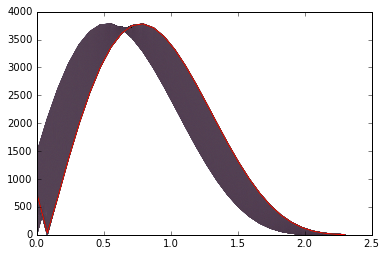

In [83]:
for x in range(0,LL):
    plt.plot(testBin,Expected[x])

In [84]:
def LogLLL(observed,predicted):
    #KillBins = np.array([22, 23, 24, 25, 26, 27, 28])#np.where(predicted == 0)[0]
    KillBins = np.where(predicted == 0)[0]
    predicted[predicted == 0] = 1e-100
    Obs = observed#np.delete(observed,KillBins)
    Pre = predicted#np.delete(predicted,KillBins)
    A = (Obs * np.log(Pre))
    B = Pre
    #C = np.log(fact(Obs))
    LLH = np.sum(A-B)#-C
    return -LLH
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def Sigmas(llh,s):
    mm = min(llh)
    cut = np.where(llh==mm)[0][0]

    ll = len(llh)
    Left  = llh[0:cut]
    Right = llh[cut:ll]
    lp = find_nearest(Left,mm+s)
    lpp= np.where(Left == lp)[0][0]
    rp = find_nearest(Right,mm+s)
    rpp= np.where(Right == rp)[0][0]+cut
    return lpp,rpp

In [85]:
LLH = np.array([]) 
data = Poss(Truth)*dx
for x in range(0,LL):
    val = LogLLL(data,Expected[x])
    LLH = np.append(LLH,val)

In [86]:
LLH

array([-1497648.33876063, -1497678.38127964, -1497708.40106818, ...,
       -1508530.87984188, -1508654.36345522, -1508771.53614643])

In [87]:
len(LLH)

1501

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


fit val = 1.128
1 sigma up 1.129
1 sigma dn 1.127
3 sigma up 1.13
3 sigma dn 1.125


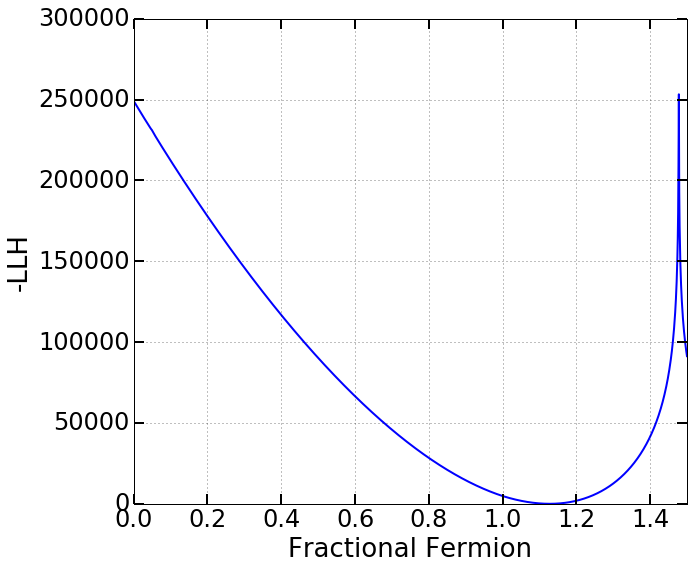

In [88]:
LLH = np.array([]) 
data = Poss(Truth)

for x in range(0,LL):
    val = LogLLL(data,Expected[x])
    LLH = np.append(LLH,val)
    
aa = min(LLH)
qq = np.where(LLH ==aa)[0][0]
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(PFermion,LLH+abs(aa),color='blue',linewidth=2)


plt.ylabel("-LLH",fontsize=26)
plt.xlabel("Fractional Fermion",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.grid(True)
plt.tight_layout()

plt.xlim(0,1.5)
print('fit val =',PFermion[qq])
L,R = Sigmas(LLH,0.5)
print('1 sigma up',PFermion[R])
print('1 sigma dn',PFermion[L])
L,R = Sigmas(LLH,2)
print('3 sigma up',PFermion[R])
print('3 sigma dn',PFermion[L])
#plt.savefig('/Users/austinmcdonald/Desktop/FermiLLH100.pdf')

plt.show()

fit val = 0.6
1 sigma up 0.601
1 sigma dn 0.598
3 sigma up 0.602
3 sigma dn 0.597


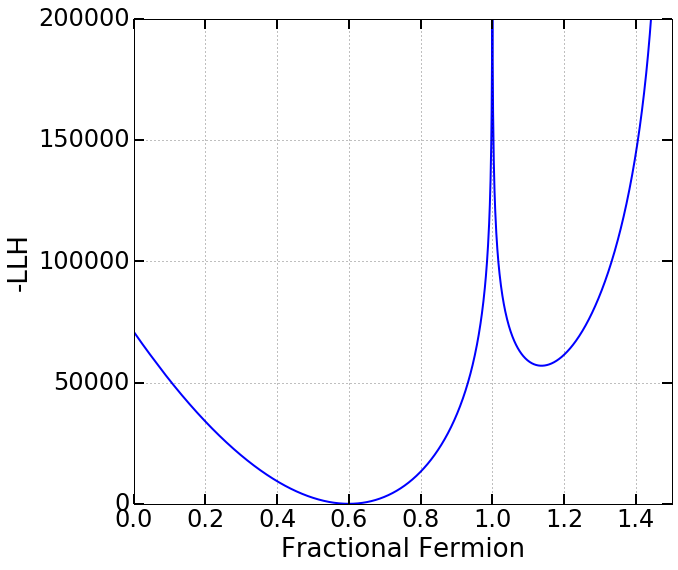

In [89]:
FF = Fermi(testBin,0.6)
dx = testBin[2]-testBin[1]
A = sum(FF)*dx
COR = 200e3/A
Truth2 = FF*COR
LLH = np.array([]) 
data = Poss(Truth2)
for x in range(0,LL):
    val = LogLLL(data,Expected[x])
    LLH = np.append(LLH,val)
    
aa = min(LLH)
qq = np.where(LLH ==aa)[0][0]
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(PFermion,LLH+abs(aa),color='blue',linewidth=2)


plt.ylabel("-LLH",fontsize=26)
plt.xlabel("Fractional Fermion",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.grid(True)
plt.tight_layout()

plt.xlim(0,1.5)
plt.ylim(0,200e3)
print('fit val =',PFermion[qq])
L,R = Sigmas(LLH,0.5)
print('1 sigma up',PFermion[R])
print('1 sigma dn',PFermion[L])
L,R = Sigmas(LLH,2)
print('3 sigma up',PFermion[R])
print('3 sigma dn',PFermion[L])
#plt.savefig('/Users/austinmcdonald/Desktop/FermiLLH100.pdf')

plt.show()

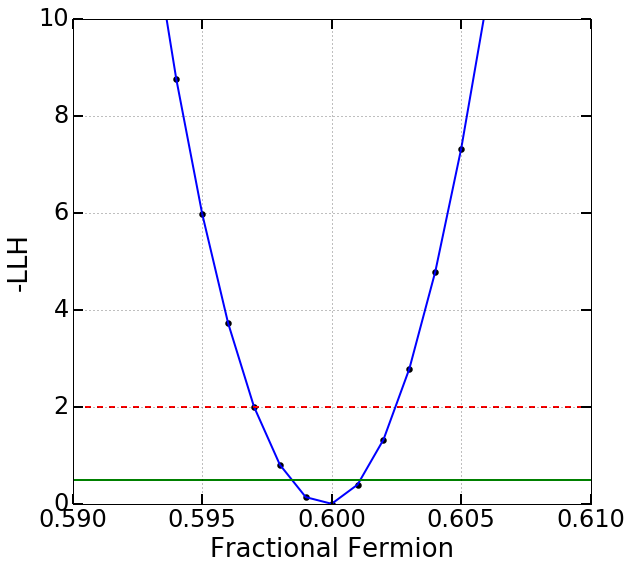

In [90]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(PFermion,LLH+abs(aa),color='blue',linewidth=2)
plt.scatter(PFermion,LLH+abs(aa),color='k',linewidth=2)

plt.ylabel("-LLH",fontsize=26)
plt.xlabel("Fractional Fermion",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.grid(True)
plt.tight_layout()

plt.xlim(0.59,0.61)
plt.ylim(0,10)
plt.axhline(0.5,color='g',linewidth=2,linestyle='-')
plt.axhline(2,color='r',linewidth=2,linestyle='--')

#plt.savefig('/Users/austinmcdonald/Desktop/FermiLLH050.pdf')

plt.show()

In [38]:
################################################################
# This is where the comparsion to the exo data starts 
# the hope it to see how well it match the theory
################################################################


In [94]:
decay0 = np.loadtxt('/Users/austinmcdonald/Desktop/bb2nuE.txt')

In [95]:
T_half = 2.165e21  # in years
exo_expo = 177600   # exposure in g*yr
Na = 6.02e23       #atoms/mol
molar_mass = 136   # Xe molar mass in g
Natoms = exo_expo/molar_mass*Na
Nexpt = Natoms/T_half
Nexpt

363113.70737671515

In [101]:
ransam = np.random.randint(0,len(decay0),Nexpt)
ransam

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([1427058, 1628126, 1147958, ...,  867993, 1799937,  751526])

In [109]:
dat = decay0[ransam]
dat = dat[dat>1]
len(dat)

109513

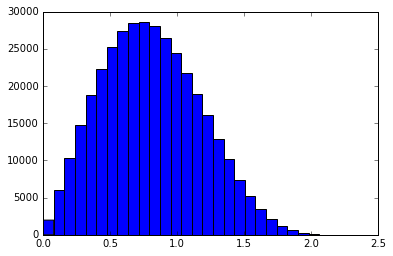

In [103]:
plt.hist(decay0[ransam],bins=testBin)
plt.show()

In [104]:
le = len(Xval)
a = find_nearest(Xval,1)
aa = np.where(Xval == a)[0][0]
tot_count = sum(Fermi(Xval,1))
prt_count = sum(Fermi(Xval,1)[aa:le])
frac = prt_count/tot_count

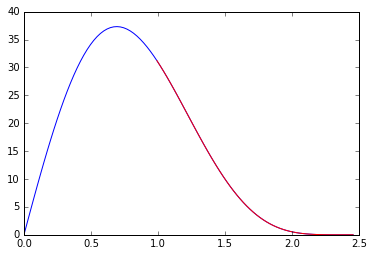

In [106]:
plt.plot(Xval,Fermi(Xval,1))
plt.plot(Xval[aa:le],Fermi(Xval,1)[aa:le],color='r')
plt.show()

In [107]:
Nexpt*frac

117124.54197856862

In [30]:
191039/112255

1.70183065342301

In [31]:
cd /Users/austinmcdonald/Desktop/AreNeutrinosFermi

/Users/austinmcdonald/Desktop/AreNeutrinosFermi


In [32]:
glob.glob("*.csv")

['exo200.csv']

In [33]:
exo200 = np.genfromtxt('exo200.csv',delimiter=',')
sum(exo200[:,1][2:68])

191039.35044509187

In [111]:
testB = np.linspace(1006e-3, 1982e-3,endpoint=True, num=69)#167
testB[2] - testB[1]

0.014352941176470457

In [103]:
Num = 24000
Nval = np.linspace(1,Q,Num)
Ntes = np.array([])
LL = len(Nval)
for x in range(0,LL):
    X = Nval[x]
    Y = Fermi(X,1)
    Full = np.ones(Y)*X
    Ntes = np.append(Ntes,Full)
len(Ntes)

192105

In [91]:
max(exo200[:,0][2:68]) 

1982.8926905132193

In [106]:
Ntes

array([ 1.        ,  1.        ,  1.        , ...,  1.9301759 ,
        1.93023664,  1.93029739])

In [112]:
histN, bin_edgesN = np.histogram(Ntes,bins=testB)
bin_cN = (bin_edgesN[:-1] + bin_edgesN[1:])/2

In [113]:
histN

array([7110, 6919, 6844, 6628, 6585, 6372, 6241, 6162, 5915, 5819, 5664,
       5506, 5379, 5192, 5059, 4932, 4720, 4591, 4503, 4252, 4152, 4029,
       3820, 3731, 3540, 3427, 3304, 3103, 3053, 2832, 2756, 2596, 2497,
       2360, 2236, 2133, 2008, 1888, 1811, 1659, 1648, 1416, 1422, 1296,
       1180, 1180, 1012,  944,  944,  807,  708,  708,  708,  497,  472,
        472,  474,  407,  236,  236,  237,  236,  236,  237,   94,    0,
          0,    0])

In [110]:
bin_cN

array([ 1013.17647059,  1027.52941176,  1041.88235294,  1056.23529412,
        1070.58823529,  1084.94117647,  1099.29411765,  1113.64705882,
        1128.        ,  1142.35294118,  1156.70588235,  1171.05882353,
        1185.41176471,  1199.76470588,  1214.11764706,  1228.47058824,
        1242.82352941,  1257.17647059,  1271.52941176,  1285.88235294,
        1300.23529412,  1314.58823529,  1328.94117647,  1343.29411765,
        1357.64705882,  1372.        ,  1386.35294118,  1400.70588235,
        1415.05882353,  1429.41176471,  1443.76470588,  1458.11764706,
        1472.47058824,  1486.82352941,  1501.17647059,  1515.52941176,
        1529.88235294,  1544.23529412,  1558.58823529,  1572.94117647,
        1587.29411765,  1601.64705882,  1616.        ,  1630.35294118,
        1644.70588235,  1659.05882353,  1673.41176471,  1687.76470588,
        1702.11764706,  1716.47058824,  1730.82352941,  1745.17647059,
        1759.52941176,  1773.88235294,  1788.23529412,  1802.58823529,
      

In [98]:
a = find_nearest(bin_cN,1) 
ab = np.where(bin_cN == a)[0][0]

In [99]:
ll = len(bin_cN)
bin_cN[ab:ll]
ll

68

In [82]:
part = sum(histN[ab:ll])
tot=sum(histN)
part/tot

1.0

In [83]:
sum(exo200[:,1][2:68])

191039.35044509187

In [84]:
len(exo200[:,1][2:68])

66

In [86]:
len(histN[ab:ll])

75

In [63]:
corr = 363242/sum(histN)
corr

2.094990368311167

In [291]:
a = find_nearest(exo200[:,0][2:90],2000) 
np.where(exo200[:,0][2:90] == a)


(array([66]),)

(1, 2)

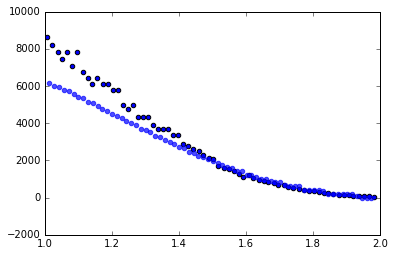

In [118]:
plt.scatter(exo200[:,0][2:68]/1e3,exo200[:,1][2:68])
plt.scatter(bin_cN,histN*0.87,color='b',alpha=0.7,label='expct')

plt.xlim(1,2)

In [70]:
histE

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0, 191190,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [ ]:
/Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH/

In [219]:
Pferm = np.linspace(0.0,1,1001)
def write_File(Data,name):
    Name = "{0:.3f}".format(name)
    path = "/Users/austinmcdonald/Desktop/AreNeutrinosFermi/truthLLH/Truth-V0-"+Name+".txt"
    np.savetxt(path,Data)

In [217]:
Pferm = np.linspace(0.0,1,1001)
Pferm

array([ 0.   ,  0.001,  0.002, ...,  0.998,  0.999,  1.   ])